Adapted from tank_filling.m by Takashi Yokokura F2023 for UC Berkeley CHMENG 140 F2023. Written to match syntax and flow of MATLAB code, not necessarily for Python best practice

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
from scipy.integrate import solve_ivp    

In [2]:
# Define differential equation
def dhdt(t,h):
    dhdt = np.zeros((1,1))
    
    Qin = 4 # ft3/min
    A = 3.1416*4**2/4 # ft2
    
    dhdt[0] = Qin/A
    
    return dhdt

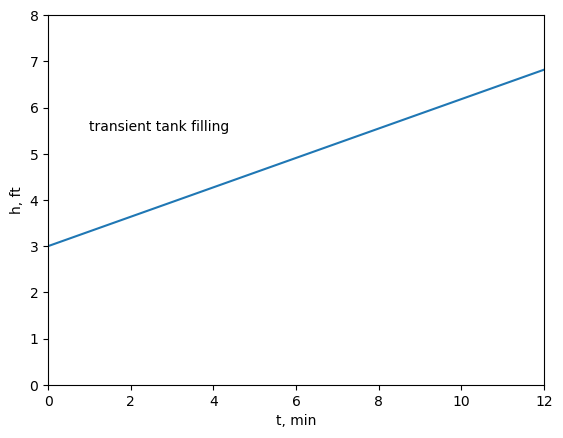

In [3]:
# Initial Conditions
initialheight = [3]
trange = [0, 12]

# Solve ODE
results = solve_ivp(dhdt, trange, initialheight, method='RK45', rtol=1e-04, dense_output=True)

# Collect results
h, t = results.y, results.t

# Plot results
plt.figure()
plt.plot(t, *h) # Don't worry about the *; they're just to "unpack" the arrays
plt.xlim([0, 12])
plt.xlabel('t, min')
plt.ylim([0, 8])
plt.ylabel('h, ft')
plt.text(1, 5.5, 'transient tank filling')
plt.show()

In [4]:
# Default Python table 
display(pd.DataFrame([*h, t], index=['h', 't']).T)

,h,t
0,3.000000,0.000000
1,3.031477,0.098888
2,3.346246,1.087768
3,6.493941,10.976565
4,6.819710,12.000000


In [4]:
# Get the same table as the MATLAB example
sol = results.sol
tin = np.arange(0, 12.01, 0.30)

display(pd.DataFrame([*sol(tin), tin], index=['h', 't']).T)

,h,t
0,3.000000,0.0
1,3.095493,0.3
2,3.190985,0.6
3,3.286478,0.9
4,3.381971,1.2
5,3.477464,1.5
6,3.572956,1.8
7,3.668449,2.1
8,3.763942,2.4
9,3.859435,2.7
